In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import glob
import json
import datetime
import nltk
nltk.download('stopwords')
nltk.download('stopwords')
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /home/habte/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /home/habte/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
nltk.download('punkt')
# Add parent directory to path to import modules from src
rpath = os.path.abspath('..')
if rpath not in sys.path:
    sys.path.insert(0, rpath)

from src.loader import SlackDataLoader
import src.utils as utils
import src.plotter as plotter

[nltk_data] Downloading package stopwords to /home/habte/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/habte/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/habte/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
import pandas as pd
json_file_path = '/home/habte/Desktop/Anonymized_B6SlackExport_25Nov23/anonymized/channels.json'
data = pd.read_json(json_file_path)

In [5]:
data.head()

id                    name     created      creator  is_archived  \
0  C03T0APHX63  all-community-building  1660301317  U03TEPYRM2P        False   
1  C03T0AX4K6K   all-technical-support  1660301462  U03TEPYRM2P        False   
2  C03T89KDGA2    all-career-exercises  1660301361  U03TEPYRM2P        False   
3  C03T89PMJKG           all-resources  1660301441  U03TEPYRM2P        False   
4  C03TBUCU4UD                  random  1660300985  U03TEPYRM2P        False   

   is_general                                            members  \
0       False  [U03T89ACUUW, U03TEPYRM2P, U03TNP8Q8CT, U03TT5...   
1       False  [U03T89ACUUW, U03TEPYRM2P, U03TNP8Q8CT, U03TT5...   
2       False  [U03T89ACUUW, U03TEPYRM2P, U03TNP8Q8CT, U03TT5...   
3       False  [U03T89ACUUW, U03TEPYRM2P, U03TNP8Q8CT, U03TT5...   
4       False  [U03T89ACUUW, U03TEPYRM2P, U03TNP8Q8CT, U03TT5...   

                                         topic  \
0  {'value': '', 'creator': '', 'last_set': 0}   
1  {'value': '', 'creator': '', 'last_set': 0}   
2  {'value': '', 'creator': '', 'last_set': 0}   
3  {'value': '', 'creator': '', 'last_set': 0}   
4  {'value': '', 'creator': '', 'last_set': 0}   

                                             purpose  \
0        {'value': '', 'creator': '', 'last_set': 0}   
1        {'value': '', 'creator': '', 'last_set': 0}   
2        {'value': '', 'creator': '', 'last_set': 0}   
3        {'value': '', 'creator': '', 'last_set': 0}   
4  {'value': 'This channel is for... well, everyt...   

                                                pins  
0                                                NaN  
1                                                NaN  
2  [{'id': '1663839365.770289', 'type': 'C', 'cre...  
3  [{'id': '1667584331.857749', 'type': 'C', 'cre...  
4                                                NaN

In [6]:
data.tail()

id              name     created      creator  is_archived  \
34  C049RETDA31     all-de-week12  1668000519  U03TEPYRM2P        False   
35  C04A3FV2L1F        all-week12  1667798997  U03TEPYRM2P        False   
36  C04AJMGPU01   all-web3-week12  1668000999  U03TEPYRM2P        False   
37  C04BFKFETA9  machine-learning  1668759897  U03UL5LSTG9        False   
38  C04BM2JS9DJ  data-engineering  1668760175  U03UL5LSTG9        False   

    is_general                                            members  \
34       False  [U03TEPYRM2P, U03U1FNPEUX, U03U1HAG9TR, U03U1J...   
35       False  [U03T89ACUUW, U03TEPYRM2P, U03TNP8Q8CT, U03TT5...   
36       False  [U03TEPYRM2P, U03U9DB7REG, U03UJGRN5E0, U03UKL...   
37       False  [U03T89ACUUW, U03TEPYRM2P, U03TT5KEYCF, U03U4G...   
38       False  [U03T89ACUUW, U03TEPYRM2P, U03TNP8Q8CT, U03TT5...   

                                          topic  \
34  {'value': '', 'creator': '', 'last_set': 0}   
35  {'value': '', 'creator': '', 'last_set': 0}   
36  {'value': '', 'creator': '', 'last_set': 0}   
37  {'value': '', 'creator': '', 'last_set': 0}   
38  {'value': '', 'creator': '', 'last_set': 0}   

                                        purpose pins  
34  {'value': '', 'creator': '', 'last_set': 0}  NaN  
35  {'value': '', 'creator': '', 'last_set': 0}  NaN  
36  {'value': '', 'creator': '', 'last_set': 0}  NaN  
37  {'value': '', 'creator': '', 'last_set': 0}  NaN  
38  {'value': '', 'creator': '', 'last_set': 0}  NaN

In [7]:
data.describe().T

count          mean           std           min           25%  \
created   39.0  1.663885e+09  2.931766e+06  1.660301e+09  1.661735e+09   

                  50%           75%           max  
created  1.662985e+09  1.667048e+09  1.668760e+09

In [8]:
data.describe(include='all').T

count unique                                                top  \
id             39     39                                        C03T0APHX63   
name           39     39                             all-community-building   
created      39.0    NaN                                                NaN   
creator        39     15                                        U03TEPYRM2P   
is_archived    39      2                                              False   
is_general     39      2                                              False   
members        39     24  [U03T89ACUUW, U03TEPYRM2P, U03TNP8Q8CT, U03TT5...   
topic          39      3        {'value': '', 'creator': '', 'last_set': 0}   
purpose        39      5        {'value': '', 'creator': '', 'last_set': 0}   
pins            9      9  [{'id': '1663839365.770289', 'type': 'C', 'cre...   

            freq               mean             std           min  \
id             1                NaN             NaN           NaN   
name           1                NaN             NaN           NaN   
created      NaN  1663885447.641026  2931765.578985  1660300985.0   
creator       22                NaN             NaN           NaN   
is_archived   38                NaN             NaN           NaN   
is_general    38                NaN             NaN           NaN   
members       16                NaN             NaN           NaN   
topic         37                NaN             NaN           NaN   
purpose       35                NaN             NaN           NaN   
pins           1                NaN             NaN           NaN   

                      25%           50%           75%           max  
id                    NaN           NaN           NaN           NaN  
name                  NaN           NaN           NaN           NaN  
created      1661735190.0  1662984641.0  1667047811.0  1668760175.0  
creator               NaN           NaN           NaN           NaN  
is_archived           NaN           NaN           NaN           NaN  
is_general            NaN           NaN           NaN           NaN  
members               NaN           NaN           NaN           NaN  
topic                 NaN           NaN           NaN           NaN  
purpose               NaN           NaN           NaN           NaN  
pins                  NaN           NaN           NaN           NaN

In [9]:
# Initialize DataLoader
sl = SlackDataLoader('/home/habte/Desktop/Anonymized_B6SlackExport_25Nov23/anonymized/')

In [10]:
df = sl.slack_parser('/home/habte/Desktop/Anonymized_B6SlackExport_25Nov23/anonymized')
print(df.shape)
df.head()

{'client_msg_id': 'a6699b4e-687c-4a22-a007-99594d6bb13a', 'type': 'message', 'text': '<https://youtu.be/zoKn4qk4mac>', 'user': 'U03UJH1EQQL', 'ts': '1665837934.076499', 'blocks': [{'type': 'rich_text', 'block_id': '7M06R', 'elements': [{'type': 'rich_text_section', 'elements': [{'type': 'link', 'url': 'https://youtu.be/zoKn4qk4mac'}]}]}], 'team': 'T03U4J8HMUG', 'user_team': 'T03U4J8HMUG', 'source_team': 'T03U4J8HMUG', 'user_profile': {'avatar_hash': '81b299d9869c', 'image_72': 'https://avatars.slack-edge.com/2022-08-20/3953555815671_81b299d9869ca44e70c1_72.png', 'first_name': 'Kelly', 'real_name': 'Kelly Soto', 'display_name': 'Kelly Soto', 'team': 'T03U4J8HMUG', 'name': 'Kelly', 'is_restricted': False, 'is_ultra_restricted': False}, 'attachments': [{'from_url': 'https://youtu.be/zoKn4qk4mac', 'thumb_url': 'https://i.ytimg.com/vi/zoKn4qk4mac/hqdefault.jpg', 'thumb_width': 480, 'thumb_height': 360, 'video_html': '<iframe width="400" height="225" src="https://www.youtube.com/embed/zoKn4q

msg_type                                        msg_content   sender_name  \
0  message                     <https://youtu.be/zoKn4qk4mac>    Kelly Soto   
1  message  Good morning everyone :blush: welcome to week ...  Garrett Bell   
2  message                                      Good morning!  Carlos Gross   
3  message                                      Good Morning.   Samuel King   
4  message                                    Good Morning!!!  Daniel Brown   

       msg_sent_time msg_dist_type time_thread_start  reply_count  \
0  1665837934.076499          link                 0            0   
1  1665385707.569729          text                 0            0   
2  1665385734.616309          text                 0            0   
3  1665385760.620169          text                 0            0   
4  1665387214.795849          text                 0            0   

   reply_users_count reply_users tm_thread_end     channel  
0                  0           0             0  anonymized  
1                  0           0             0  anonymized  
2                  0           0             0  anonymized  
3                  0           0             0  anonymized  
4                  0           0             0  anonymized

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3342 entries, 0 to 3341
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   msg_type           3342 non-null   object
 1   msg_content        3342 non-null   object
 2   sender_name        3342 non-null   object
 3   msg_sent_time      3342 non-null   object
 4   msg_dist_type      3342 non-null   object
 5   time_thread_start  3342 non-null   object
 6   reply_count        3342 non-null   int64 
 7   reply_users_count  3342 non-null   int64 
 8   reply_users        3342 non-null   object
 9   tm_thread_end      3342 non-null   object
 10  channel            3342 non-null   object
dtypes: int64(2), object(9)
memory usage: 287.3+ KB


In [12]:
df.tail()

msg_type                                        msg_content  \
3337  message    Please always keep us abreast as event unfolds    
3338  message  I am challenging the challenge and will do so ...   
3339  message                                Thanks. I solved it   
3340  message  fast recovery for her:pray:. You are very dete...   
3341  message                                               :+1:   

           sender_name      msg_sent_time msg_dist_type  time_thread_start  \
3337      Garrett Bell  1662754940.927449          text  1662754537.015619   
3338  Veronica Padilla  1662755472.467249          text  1662754537.015619   
3339  Brenda Hernandez  1662757114.046269          text  1662750800.651429   
3340     Joshua Rhodes  1662758123.387579          text  1662754537.015619   
3341  Anthony Galloway  1662792736.423589         emoji  1662750800.651429   

      reply_count  reply_users_count reply_users tm_thread_end     channel  
3337            0                  0           0             0  anonymized  
3338            0                  0           0             0  anonymized  
3339            0                  0           0             0  anonymized  
3340            0                  0           0             0  anonymized  
3341            0                  0           0             0  anonymized

In [13]:
df.nunique()

msg_type                1
msg_content          3201
sender_name            57
msg_sent_time        3342
msg_dist_type           8
time_thread_start     501
reply_count            26
reply_users_count       9
reply_users           317
tm_thread_end         413
channel                 1
dtype: int64

In [14]:
df.isnull().sum()

msg_type             0
msg_content          0
sender_name          0
msg_sent_time        0
msg_dist_type        0
time_thread_start    0
reply_count          0
reply_users_count    0
reply_users          0
tm_thread_end        0
channel              0
dtype: int64

In [30]:
print(df.columns)

Index(['channel', 'user', 'reply_count'], dtype='object')


In [15]:
df.describe().T

count      mean       std  min  25%  50%  75%   max
reply_count        3342.0  0.573609  2.421061  0.0  0.0  0.0  0.0  61.0
reply_users_count  3342.0  0.296828  0.901883  0.0  0.0  0.0  0.0   8.0

In [16]:
df.describe(include='all').T

count unique                top    freq      mean  \
msg_type             3342      1            message    3342       NaN   
msg_content          3342   3201                yes      19       NaN   
sender_name          3342     57   Brenda Hernandez     325       NaN   
msg_sent_time        3342   3342  1665837934.076499       1       NaN   
msg_dist_type        3342      8               text    2815       NaN   
time_thread_start  3342.0  501.0                0.0   399.0       NaN   
reply_count        3342.0    NaN                NaN     NaN  0.573609   
reply_users_count  3342.0    NaN                NaN     NaN  0.296828   
reply_users        3342.0  317.0                0.0  2930.0       NaN   
tm_thread_end      3342.0  413.0                0.0  2930.0       NaN   
channel              3342      1         anonymized    3342       NaN   

                        std  min  25%  50%  75%   max  
msg_type                NaN  NaN  NaN  NaN  NaN   NaN  
msg_content             NaN  NaN  NaN  NaN  NaN   NaN  
sender_name             NaN  NaN  NaN  NaN  NaN   NaN  
msg_sent_time           NaN  NaN  NaN  NaN  NaN   NaN  
msg_dist_type           NaN  NaN  NaN  NaN  NaN   NaN  
time_thread_start       NaN  NaN  NaN  NaN  NaN   NaN  
reply_count        2.421061  0.0  0.0  0.0  0.0  61.0  
reply_users_count  0.901883  0.0  0.0  0.0  0.0   8.0  
reply_users             NaN  NaN  NaN  NaN  NaN   NaN  
tm_thread_end           NaN  NaN  NaN  NaN  NaN   NaN  
channel                 NaN  NaN  NaN  NaN  NaN   NaN

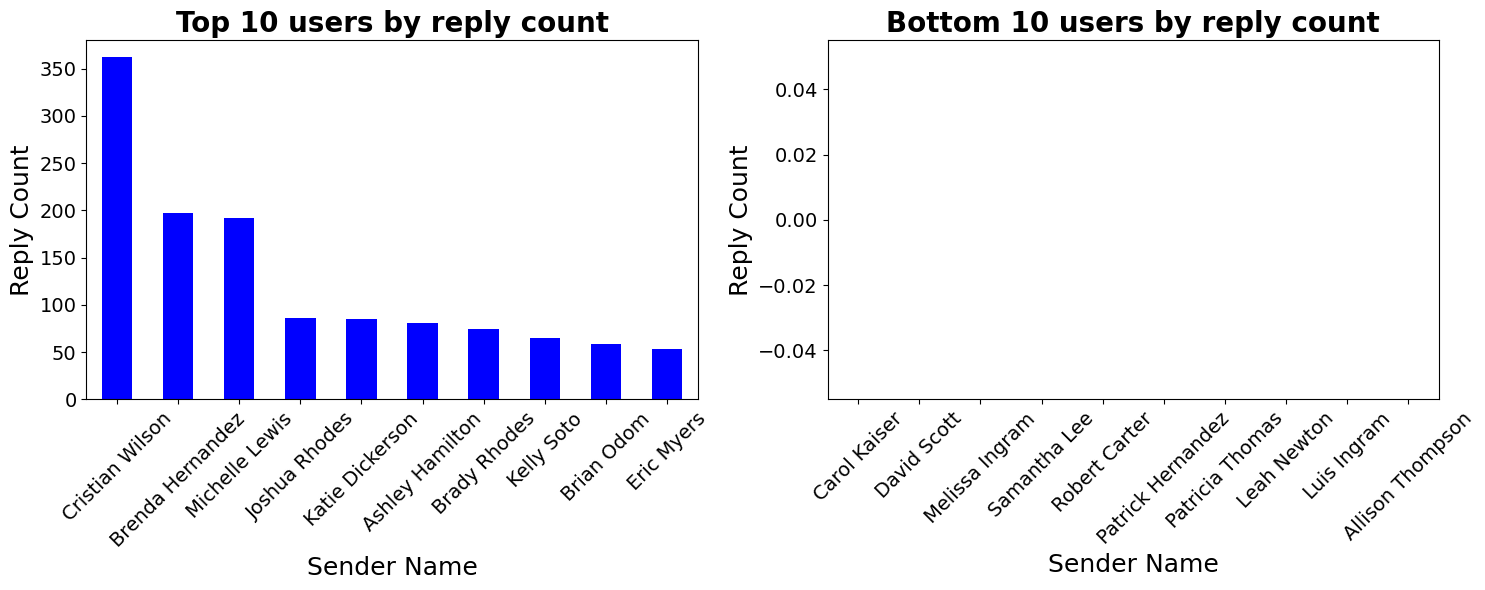

In [17]:
grouped_data = df.groupby('sender_name')['reply_count'].sum()
top_10_users = grouped_data.sort_values(ascending=False)[:10]
bottom_10_users = grouped_data.sort_values(ascending=False)[-10:]

# Plotting the top 10 users
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
top_10_users.plot(kind='bar', color='blue')
plt.title('Top 10 users by reply count', size=20, fontweight='bold')
plt.xlabel("Sender Name", size=18)
plt.ylabel("Reply Count", size=18)
plt.xticks(rotation=45, size=14)
plt.yticks(size=14)
# Plotting the bottom 10 users
plt.subplot(1, 2, 2)
bottom_10_users.plot(kind='bar', color='red')
plt.title('Bottom 10 users by reply count', size=20, fontweight='bold')
plt.xlabel("Sender Name", size=18)
plt.ylabel("Reply Count", size=18)
plt.xticks(rotation=45, size=14)
plt.yticks(size=14)

plt.tight_layout()
plt.show()


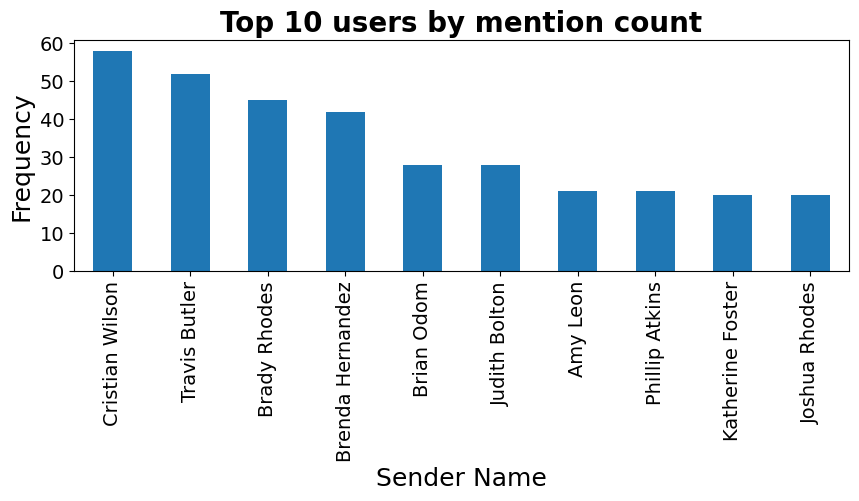

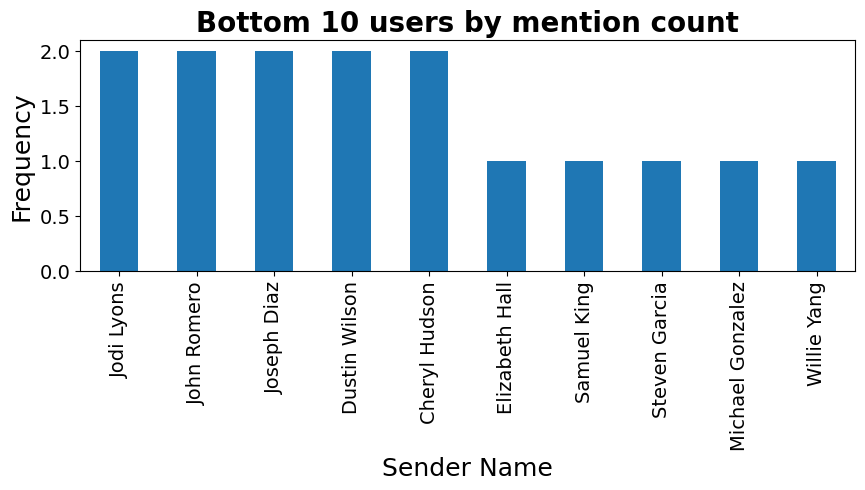

In [18]:
# Top 10 users by mention count
mention_counts = df[df['msg_content'].str.contains('@U\w+')]
mention_counts.groupby('sender_name')['msg_content'].count().sort_values(ascending=False)[:10]\
    .plot(kind='bar', figsize=(10, 3))
plt.title('Top 10 users by mention count', size=20, fontweight='bold')
plt.xlabel("Sender Name", size=18)
plt.ylabel("Frequency", size=18)
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()

# Bottom 10 users by mention count
mention_counts.groupby('sender_name')['msg_content'].count().sort_values(ascending=False)[-10:]\
    .plot(kind='bar', figsize=(10, 3))
plt.title('Bottom 10 users by mention count', size=20, fontweight='bold')
plt.xlabel("Sender Name", size=18)
plt.ylabel("Frequency", size=18)
plt.xticks(size=14)
plt.yticks(size=14)
plt.show()


In [19]:
#for the top 10 messages by replies
top = df.groupby('msg_content')['reply_count'].sum().sort_values(ascending = False)[:10]
print('The top 10 messages by reply count are\n{}\n'.format(top))
#for bottom 10 messages by reply coount
bott = df.groupby('msg_content')['reply_count'].sum().sort_values(ascending = False)[-10:]
print('The bottom 10 messages by reply count are\n{}\n'.format(bott))

The top 10 messages by reply count are
msg_content
1. How do I find my jupyter notebook file in my instance(using the terminal)?  \n2. How do I find folders I've created in my remote machine inside jupyter notebook web-interface?\n<@U03UKL27B0R> <@U03V8LHPDME>                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [20]:
#top and bottom 10 messages by mentions are
mention_count = df['msg_content'].str.count(r'@\w+')
df['mention_count'] = mention_count
top_10_messages = df[['msg_content', 'mention_count']].nlargest(10, 'mention_count')
bot_10_messages = df[['msg_content', 'mention_count']].nsmallest(10, 'mention_count')
print('The top 10 messages by mention count are:\n{}\n'.format(top_10_messages))
print('The bottom 10 messages by mention count are:\n{}\n'.format(bot_10_messages))


The top 10 messages by mention count are:
                                            msg_content  mention_count
1449  So, during our group meeting, there is a quest...              8
616   <@U03UKL27B0R> <@U03UP7V9Q57> <@U03U9DB7REG> <...              4
1063  <@U03UVHCV6KB> <@U03UJGP0C68> <@U03UG4Q7V42> <...              4
2135  <@U03UKL27B0R> <@U03U9DB7REG> <@U03V8LHPDME> <...              4
3276  <@U03UKL27B0R>\n<@U03UP7V9Q57>\n<@U03TX2VN6H5>...              4
105        <@U03UKL27B0R> <@U03U9DB7REG> <@U03V8LHPDME>              3
132   <!channel>\nTher is a section that says\n• Lin...              3
181        <@U03V8LHPDME> <@U03UKL27B0R> <@U03U9DB7REG>              3
208   I used\n```sudo rm /usr/local/bin/docker-compo...              3
302   <@U03V8LHPDME> <@U03U9DB7REG> <@U03UKL27B0R> I...              3

The bottom 10 messages by mention count are:
                                         msg_content  mention_count
0                     <https://youtu.be/zoKn4qk4mac>           

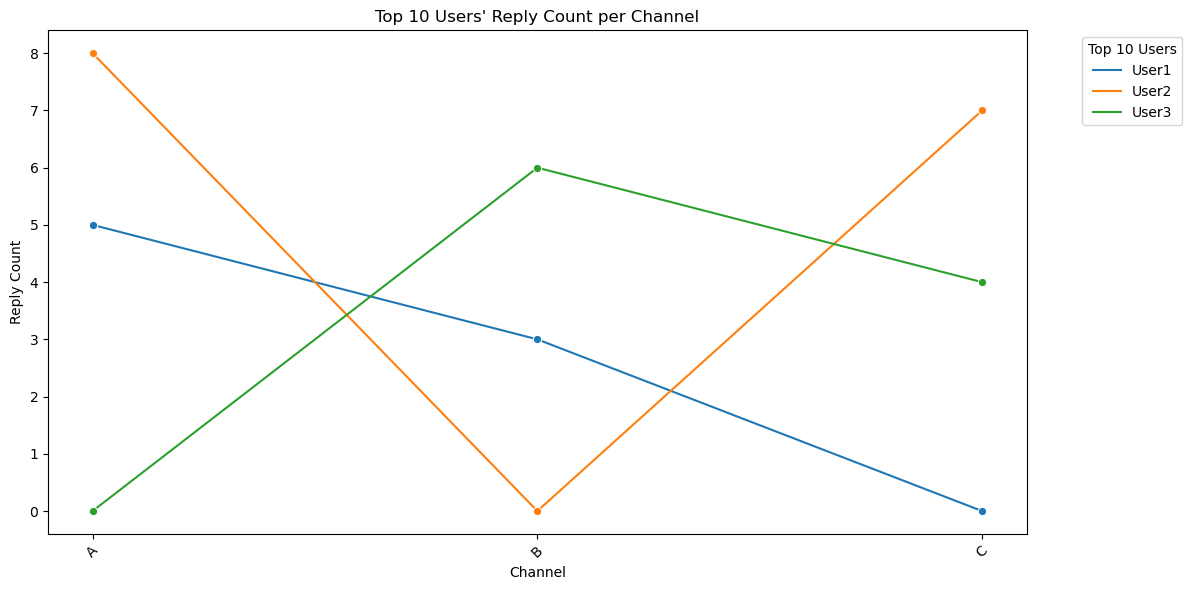

In [28]:
df = pd.DataFrame(data)

# Grouping and Summing
reply_counts = df.groupby(['channel', 'user'])['reply_count'].sum().unstack().fillna(0)

# Selecting Top Users
top_users_per_channel = reply_counts.apply(lambda x: x.nlargest(10))

# Reshaping Data
top_users_per_channel = top_users_per_channel.stack().reset_index()
top_users_per_channel.columns = ['Channel', 'User', 'Reply Count']

# Filtering Top Users List
top_users_list = top_users_per_channel['User'].value_counts().nlargest(10).index
top_users_per_channel = top_users_per_channel[top_users_per_channel['User'].isin(top_users_list)]

# Plotting with Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='Channel', y='Reply Count', hue='User', data=top_users_per_channel, marker='o')

# Plot Customization
plt.title('Top 10 Users\' Reply Count per Channel')
plt.xlabel('Channel')
plt.ylabel('Reply Count')
plt.xticks(rotation=45)
plt.legend(title='Top 10 Users', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


/tmp/ipykernel_6674/744302174.py:2: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df['msg_sent_time'] = pd.to_datetime(df['msg_sent_time'], unit='s')


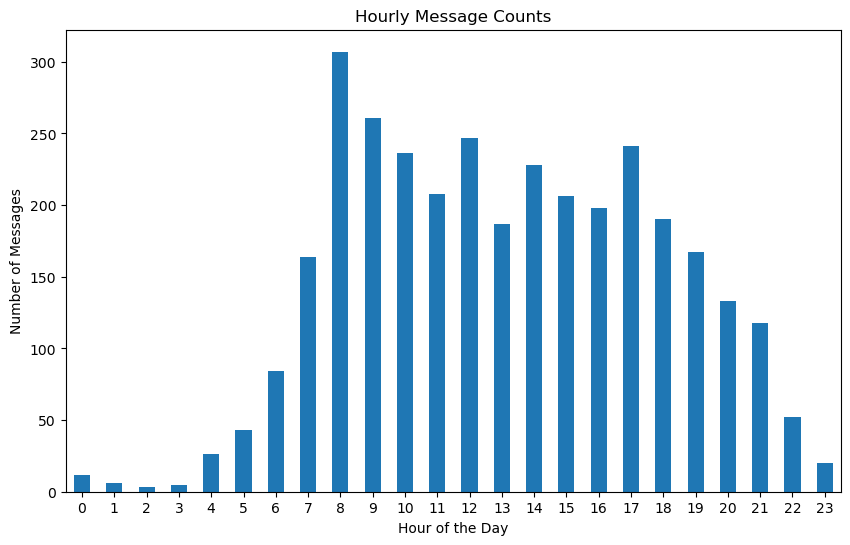

The hour with the most messages is 8:00 with 307 messages.


In [ ]:
# Convert 'msg_sent_time' column to datetime format
df['msg_sent_time'] = pd.to_datetime(df['msg_sent_time'], unit='s')

# Extract hour from message timestamps
df['hour_sent'] = df['msg_sent_time'].dt.hour

# Group messages by hour and count the number of messages in each hour
hourly_message_count = df.groupby('hour_sent').size()

# Find the hour with the maximum number of messages
hour_peak = hourly_message_count.idxmax()
max_messages = hourly_message_count.max()

# Visualize hourly message counts
hourly_message_count.plot(kind='bar', figsize=(10, 6))
plt.title('Hourly Message Counts')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Messages')
plt.xticks(rotation=0)
plt.show()

print(f"The hour with the most messages is {hour_peak}:00 with {max_messages} messages.")

In [39]:
loader = SlackDataLoader('/home/habte/Desktop/Anonymized_B6SlackExport_25Nov23/anonymized/')
df_result = loader.slack_parser('/home/habte/Desktop/Anonymized_B6SlackExport_25Nov23/anonymized')
converted_timestamps = loader.convert_2_timestamp('msg_sent_time', loader.df)
loader.df['msg_sent_time_converted'] = converted_timestamps
print(loader.df)

     msg_type                                        msg_content  \
0     message  *community Building Session REMINDER!*:timer_c...   
1     message                                              Hello   
2     message  We are waiting for Guest Talk to finish, just ...   
3     message                                                 ok   
4     message                                               helo   
...       ...                                                ...   
7608  message  An accident will happen before next week .. an...   
7609  message            So better submit it before the accident   
7610  message  You can give it to your crush , remember it sh...   
7611  message                                               Haha   
7612  message  Did I say next week? I meant last week .. my p...   

           sender_name      msg_sent_time msg_dist_type  time_thread_start  \
0       Vanessa Norman  1667908201.093329          text                  0   
1         Daniel Brown  166

In [56]:
# Assuming df_result contains labeled data with 'sender_name' and 'reply_count' columns
user_reply_counts = df_result.groupby('sender_name')['reply_count'].sum()

# Find the user with the highest number of reply counts
user_with_highest_replies = user_reply_counts.idxmax()
highest_reply_count = user_reply_counts.max()

print(f"The user with the highest number of reply counts is {user_with_highest_replies} with {highest_reply_count} replies.")


The user with the highest number of reply counts is Vanessa Norman with 295 replies.


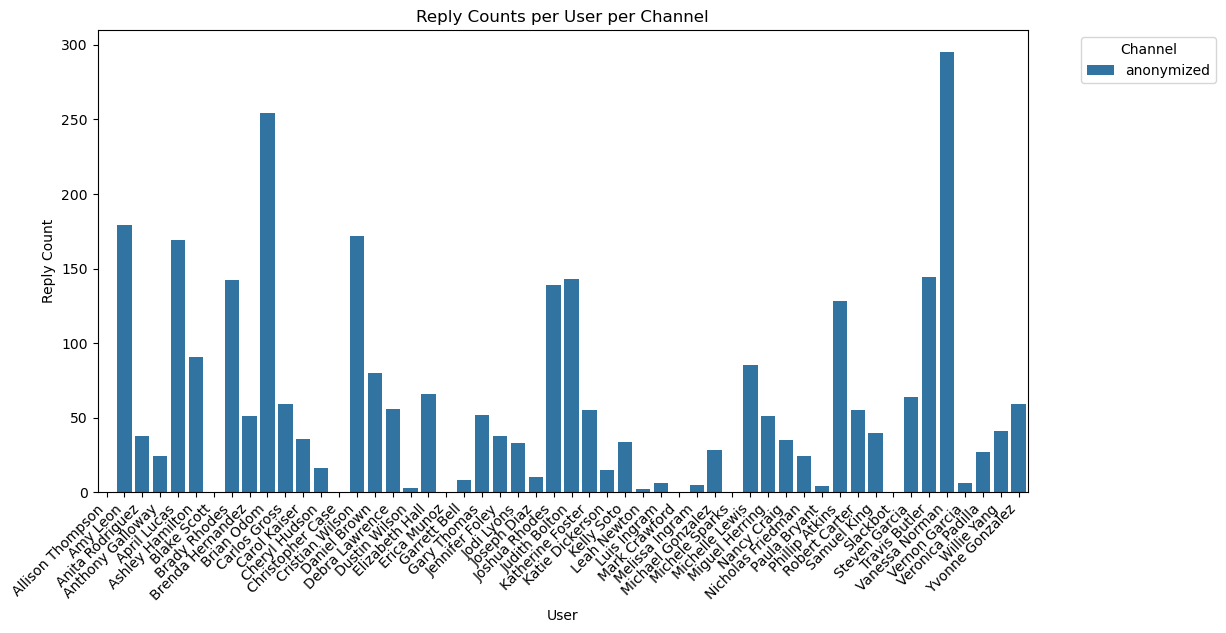

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'channel' and 'sender_name' and sum up 'reply_count'
user_channel_reply_counts = df_result.groupby(['channel', 'sender_name'])['reply_count'].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='sender_name', y='reply_count', hue='channel', data=user_channel_reply_counts)
plt.title('Reply Counts per User per Channel')
plt.xlabel('User')
plt.ylabel('Reply Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Channel', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


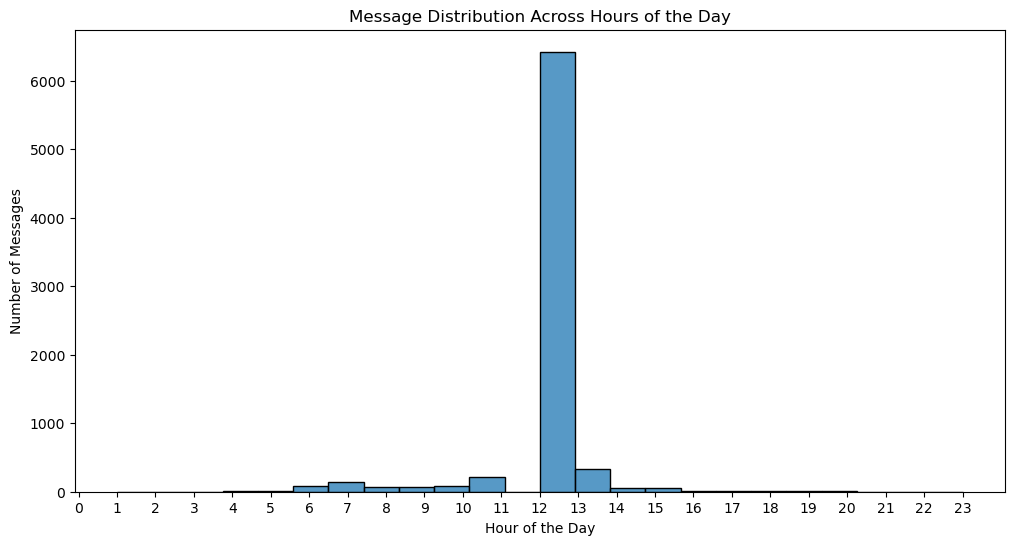

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'msg_sent_time' column to datetime format
df_result['msg_sent_time'] = pd.to_datetime(df_result['msg_sent_time'], unit='s')

# Extract hour from message timestamps
df_result['hour_sent'] = df_result['msg_sent_time'].dt.hour

# Plot the histogram
plt.figure(figsize=(12, 6))
sns.histplot(df_result['hour_sent'], bins=24, kde=False)
plt.title('Message Distribution Across Hours of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Messages')
plt.xticks(range(24))

plt.show()


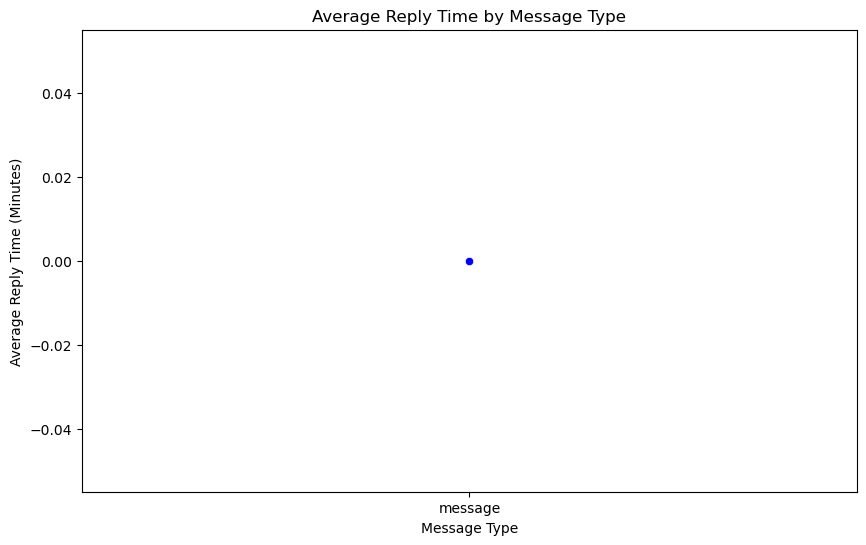

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta

df_result['msg_sent_time'] = pd.to_datetime(df_result['msg_sent_time'], unit='s')
df_result['time_thread_start'] = pd.to_datetime(df_result['time_thread_start'], unit='s')

# Filter messages with replies
replied_msg = df_result[df_result['reply_count'] != 0].copy()  # Use .copy() to create a copy

# Calculate time difference
time_difference = replied_msg['time_thread_start'] - replied_msg['msg_sent_time']

# Add a new column for reply time in minutes using .loc to avoid SettingWithCopyWarning
replied_msg.loc[:, 'reply_time_minutes'] = time_difference / timedelta(minutes=1)

# Group by message type and calculate average reply time
avg_reply_time_by_type = replied_msg.groupby('msg_type')['reply_time_minutes'].mean().reset_index()

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='msg_type', y='reply_time_minutes', data=avg_reply_time_by_type, color='blue')
plt.title('Average Reply Time by Message Type')
plt.xlabel('Message Type')
plt.ylabel('Average Reply Time (Minutes)')

plt.show()


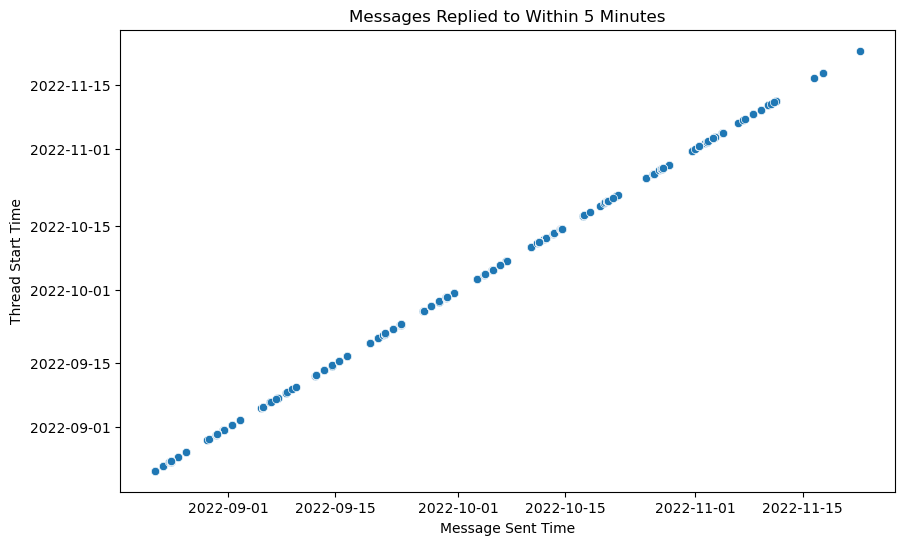

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame has 'channel', 'user', 'reply_count', 'msg_sent_time', and 'time_thread_start'
# For example, you might have loaded data into df_result using the SlackDataLoader

# Convert timestamps to datetime
df_result['msg_sent_time'] = pd.to_datetime(df_result['msg_sent_time'], unit='s')
df_result['time_thread_start'] = pd.to_datetime(df_result['time_thread_start'], unit='s')

# Filter messages with replies
replied_msg = df_result[df_result['reply_count'] != 0]

# Calculate time difference
time_difference = replied_msg['time_thread_start'] - replied_msg['msg_sent_time']

# Filter messages within 5 minutes
messages_within_5_min = replied_msg[time_difference <= pd.Timedelta(minutes=5)]

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='msg_sent_time', y='time_thread_start', data=messages_within_5_min)
plt.title('Messages Replied to Within 5 Minutes')
plt.xlabel('Message Sent Time')
plt.ylabel('Thread Start Time')
plt.show()




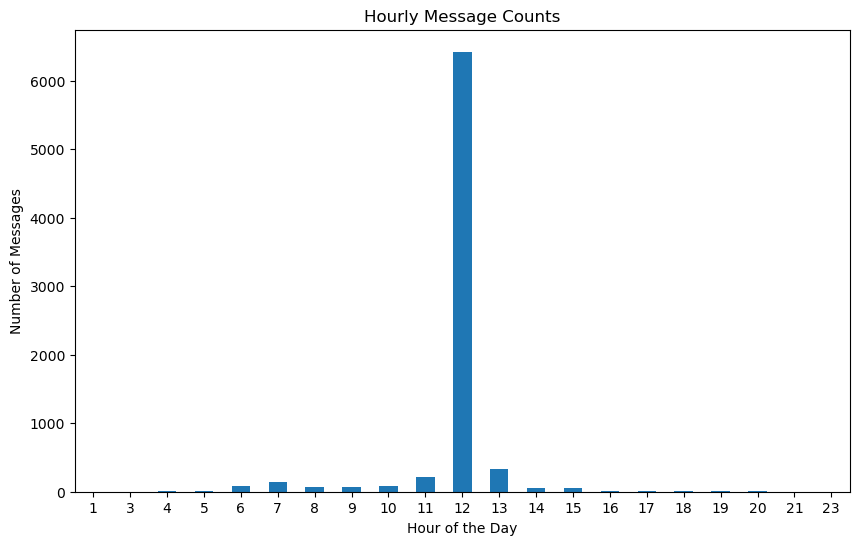

The hour with the most messages is 12:00 with 6423 messages.


In [46]:
# Convert 'msg_sent_time' column to datetime format
df_result['msg_sent_time'] = pd.to_datetime(df_result['msg_sent_time'], unit='s')

# Extract hour from message timestamps
df_result['hour_sent'] = df_result['msg_sent_time'].dt.hour

# Group messages by hour and count the number of messages in each hour
hourly_message_count = df_result.groupby('hour_sent').size()

# Find the hour with the maximum number of messages
hour_peak = hourly_message_count.idxmax()
max_messages = hourly_message_count.max()

# Visualize hourly message counts
hourly_message_count.plot(kind='bar', figsize=(10, 6))
plt.title('Hourly Message Counts')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Messages')
plt.xticks(rotation=0)
plt.show()

print(f"The hour with the most messages is {hour_peak}:00 with {max_messages} messages.")


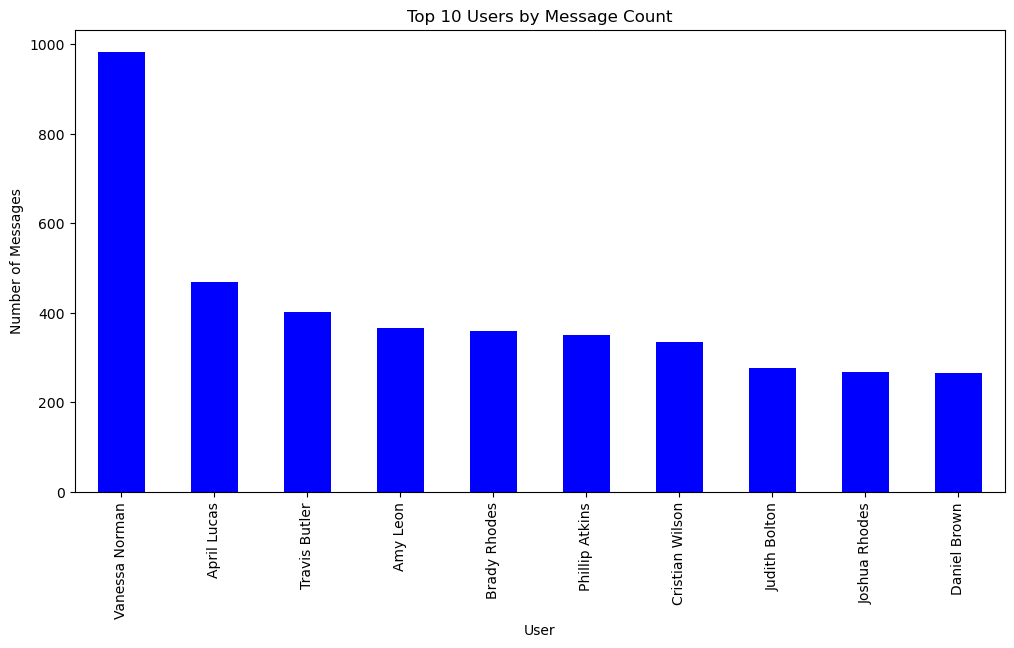

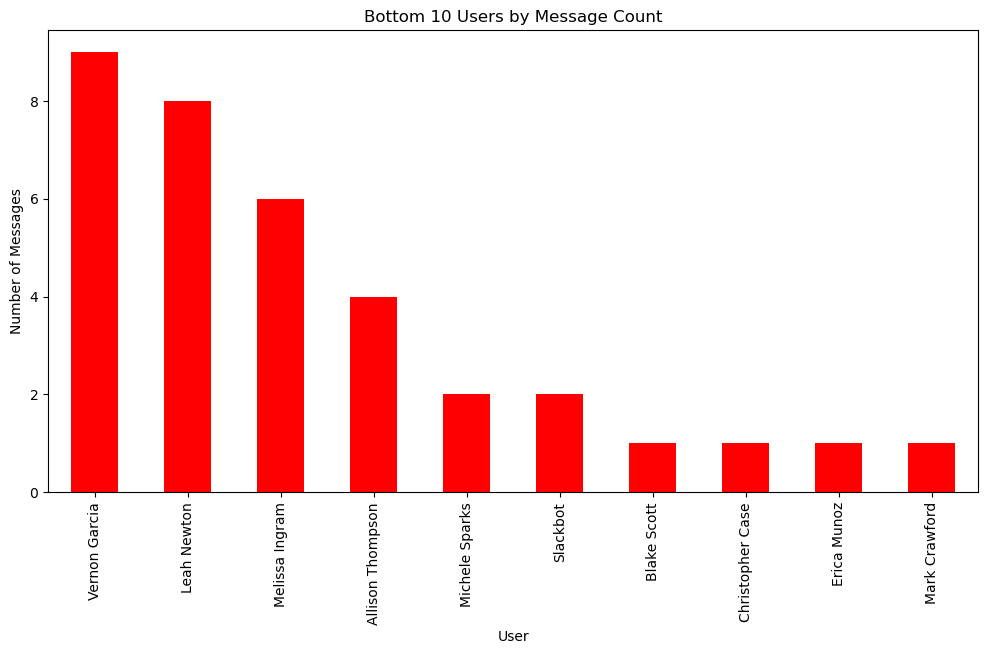

In [47]:
import matplotlib.pyplot as plt

# Get the top 10 and bottom 10 users by message count
top_users = df_result['sender_name'].value_counts().head(10)
bottom_users = df_result['sender_name'].value_counts().tail(10)

# Plotting the top 10 users
plt.figure(figsize=(12, 6))
top_users.plot(kind='bar', color='blue')
plt.title('Top 10 Users by Message Count')
plt.xlabel('User')
plt.ylabel('Number of Messages')
plt.show()

# Plotting the bottom 10 users
plt.figure(figsize=(12, 6))
bottom_users.plot(kind='bar', color='red')
plt.title('Bottom 10 Users by Message Count')
plt.xlabel('User')
plt.ylabel('Number of Messages')
plt.show()


In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

df_result['category'] = df_result['msg_type'].apply(lambda x: 'message' if x == 'message' else 'non-message')

X_train, X_test, y_train, y_test = train_test_split(df_result['msg_content'], df_result['category'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)

# Make predictions
predictions = clf.predict(X_test_tfidf)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))


Accuracy: 1.0
              precision    recall  f1-score   support

     message       1.00      1.00      1.00      1523

    accuracy                           1.00      1523
   macro avg       1.00      1.00      1.00      1523
weighted avg       1.00      1.00      1.00      1523



In [54]:
print(df_result.columns)


Index(['msg_type', 'msg_content', 'sender_name', 'msg_sent_time',
       'msg_dist_type', 'time_thread_start', 'reply_count',
       'reply_users_count', 'reply_users', 'tm_thread_end',
       'msg_sent_time_timestamp', 'time_thread_start_timestamp', 'channel',
       'msg_sent_time_converted', 'hour_sent'],
      dtype='object')


In [42]:
import pandas as pd

# Assuming your DataFrame has 'channel', 'user', 'reply_count', 'msg_sent_time', and 'time_thread_start'
# For example, you might have loaded data into df_result using the SlackDataLoader

# Convert timestamps to datetime
df_result['msg_sent_time'] = pd.to_datetime(df_result['msg_sent_time'], unit='s')
df_result['time_thread_start'] = pd.to_datetime(df_result['time_thread_start'], unit='s')

# Filter messages with replies
replied_msg = df_result[df_result['reply_count'] != 0]

# Calculate time difference
time_difference = replied_msg['time_thread_start'] - replied_msg['msg_sent_time']

# Filter messages within 5 minutes
messages_within_5_min = replied_msg[time_difference <= pd.Timedelta(minutes=5)]

# Print or further process the filtered DataFrame
print(messages_within_5_min)


/tmp/ipykernel_13211/1499549618.py:7: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df_result['msg_sent_time'] = pd.to_datetime(df_result['msg_sent_time'], unit='s')


     msg_type                                        msg_content  \
2     message  We are waiting for Guest Talk to finish, just ...   
7     message                            How was the Guest Talk?   
13    message  LinkedIn ? About 2 months ago I think.\n<@U03V...   
31    message  Let's follow each other. Drop your link in thi...   
84    message                                   It's CBS o'clock   
...       ...                                                ...   
7561  message  When I was  in campus, I needed morning for a ...   
7575  message  *My mum doesn't know I've been arrested twice,...   
7577  message  So it was back in 2020, my sister's wedding wa...   
7591  message  I broke an expensive tool and hide it.. They a...   
7592  message  May i have your dad's address now:grinning:\nI...   

           sender_name       msg_sent_time msg_dist_type   time_thread_start  \
2       Vanessa Norman 2022-11-08 12:11:44          text 2022-11-08 12:11:44   
7       Vanessa Norman 

/tmp/ipykernel_13211/1499549618.py:8: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df_result['time_thread_start'] = pd.to_datetime(df_result['time_thread_start'], unit='s')


In [51]:
print(df_result['msg_content'].head())


0    *community Building Session REMINDER!*:timer_c...
1                                                Hello
2    We are waiting for Guest Talk to finish, just ...
3                                                   ok
4                                                 helo
Name: msg_content, dtype: object


In [52]:
print(df_result['msg_type'].head())

0    message
1    message
2    message
3    message
4    message
Name: msg_type, dtype: object


In [ ]:
#filter messages with time difference less than or equal to 5 minutes
messages_within_5_min = replied_msg[time_difference <= pd.Timedelta(minutes=5)]
#calculate the fraction of messages replied within 5 minutes
fraction_replied_within_5_min = len(messages_within_5_min) / len(df) if len(df) != 0 else 0
print(f"Fraction of messages replied within 5 minutes: {fraction_replied_within_5_min*100}")

Fraction of messages replied within 5 minutes: 9.30809105251296


In [ ]:
messages_within_5_min['hour_sent'] = messages_within_5_min['msg_sent_time'].dt.hour

plt.figure(figsize=(10,8))
plt.scatter(
    (messages_within_5_min['time_thread_start'] - messages_within_5_min['msg_sent_time']).dt.total_seconds() / 60,
    messages_within_5_min['hour_sent'],
    # c=messages_within_5_min['channel_label'],
    cmap='viridis',
    alpha=0.7
)

plt.xlabel('Time difference in mins')
plt.ylabel('time of the day(24hrs)')
plt.title('messages replied within 5 mins')

# plt.colorbar(label='Channel')
plt.grid(True)
plt.show()

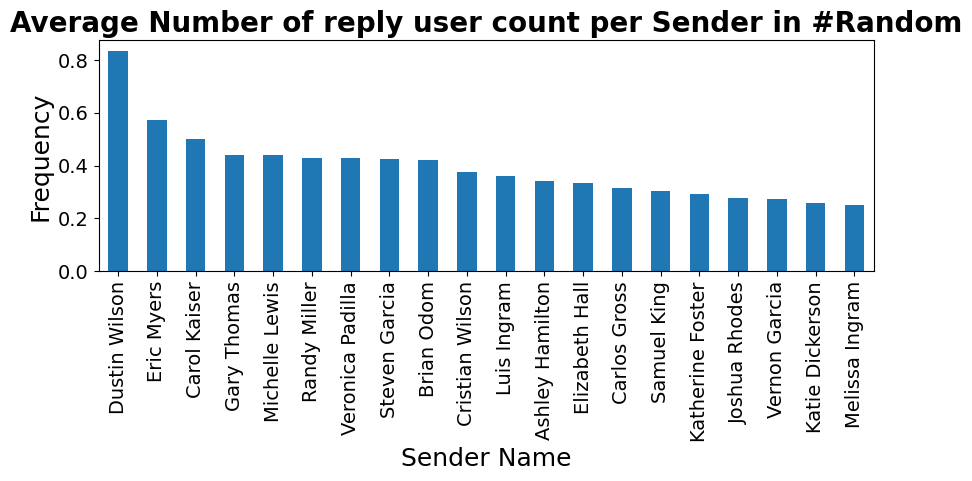

In [ ]:
plotter.draw_avg_reply_users_count(df)

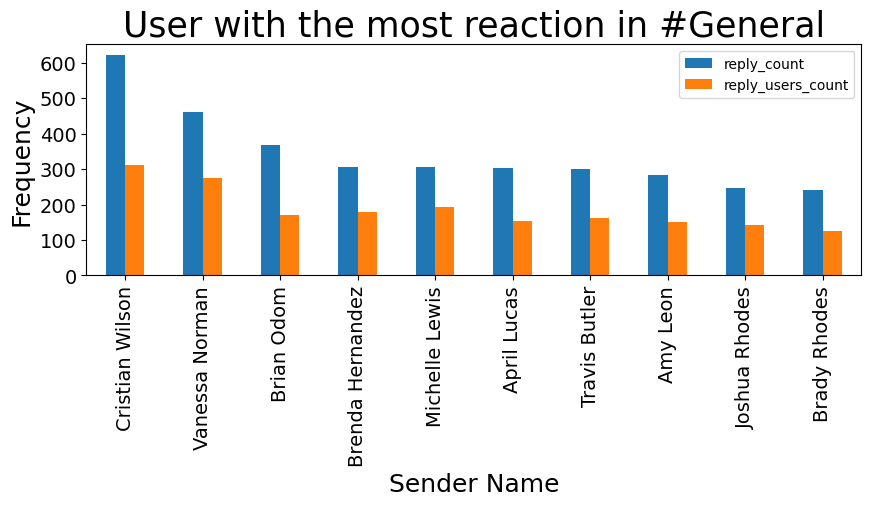

In [ ]:
plotter.draw_user_reaction(df)

## Insight Extraction

Below are some useful questions to answer. Feel free to explore to answer other interesting questions that may be of help to get insight about student's behaviour, need, and future performance 

In [ ]:
X = df['sender_name'].value_counts()[:10]
Y = df['sender_name'].value_counts()[-10:]

print('the top 10 users by message count are: \n{}'.format(X))
print(f'and the users from the bottom 10 are: \n{Y}')

the top 10 users by message count are: 
sender_name
Brenda Hernandez    325
Travis Butler       294
Cristian Wilson     283
Amy Leon            244
Michelle Lewis      171
Brady Rhodes        149
Judith Bolton       145
Joshua Rhodes       141
Brittany Garcia     120
Phillip Atkins      111
Name: count, dtype: int64
and the users from the bottom 10 are: 
sender_name
Patricia Thomas      3
Melissa Ingram       3
Samantha Lee         3
Leah Newton          2
Willie Yang          2
Randy Miller         2
Allison Thompson     1
Patrick Hernandez    1
David Scott          1
Vernon Garcia        1
Name: count, dtype: int64
